<a href="https://colab.research.google.com/github/riverKangg/riverkangg.github.io/blob/master/2020_09_20_BERT_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install transformers

     |████████████████████████████████| 890kB 2.8MB/s 
     |████████████████████████████████| 890kB 13.7MB/s 
     |████████████████████████████████| 1.1MB 16.9MB/s 
     |████████████████████████████████| 3.0MB 24.7MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=059da71bbce75985893dbfad46385b661a32db7f8a5935a1e2bc768815b58162
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [3]:
import torch
from transformers import BertTokenizer, BertModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
% matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

In [4]:
text = "임베딩을 시도할 문장이다."
marked_text = "[CLS] " + text + " [SEP]"

# Tokenize our sentence with the BERT tokenizer.
tokenized_text = tokenizer.tokenize(marked_text)

# Print out the tokens.
print(tokenized_text)

['[CLS]', '임', '##베', '##딩', '##을', '시', '##도', '##할', '문', '##장이', '##다', '.', '[SEP]']


In [5]:
list(tokenizer.vocab.keys())[11000:11020]

['33',
 'године',
 '##ן',
 'three',
 '1948',
 'fu',
 '##ů',
 'invånare',
 '##am',
 'kvadratkilometer',
 '##ou',
 '##4',
 'Earth',
 '##ä',
 'anche',
 'ben',
 '##от',
 '1942',
 '##는',
 'made']

In [6]:
# 여러 의미를 가진 "배"를 이용해서 두개의 문장을 만듦
text = "밥을 많이 먹어서 배가 부르다." \
       "고기잡이 배를 타고 바다에 나간다."

# 특수 토근 추가
marked_text = "[CLS] " + text + " [SEP]"

# 문장으로 토큰을 나누기 
tokenized_text = tokenizer.tokenize(marked_text)

# Map the token strings to their vocabulary indeces.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

# Display the words with their indeces.
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

[CLS]           101
밥             9,327
##을          10,622
많이           47,058
먹             9,266
##어          12,965
##서          12,424
배             9,330
##가          11,287
부             9,365
##르          31,401
##다          11,903
.               119
고             8,888
##기          12,310
##잡          119,199
##이          10,739
배             9,330
##를          11,513
타             9,845
##고          11,664
바             9,318
##다          11,903
##에          10,530
나             8,982
##간          18,784
##다          11,903
.               119
[SEP]           102


In [7]:
# Mark each of the 29 tokens as belonging to sentence "1".
segments_ids = [1] * len(tokenized_text)

print (segments_ids)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [8]:
# Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

In [12]:
# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-multilingual-cased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
         

In [15]:
# Run the text through BERT, and collect all of the hidden states produced
# from all 12 layers. 
with torch.no_grad():
  
  outputs = model(tokens_tensor, segments_tensors)

  # Evaluating the model will return a different number of objects based on 
  # how it's  configured in the `from_pretrained` call earlier. In this case, 
  # becase we set `output_hidden_states = True`, the third item will be the 
  # hidden states from all layers. See the documentation for more details:
  # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
  hidden_states = outputs[2]

In [16]:
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
layer_i = 0

print ("Number of batches:", len(hidden_states[layer_i]))
batch_i = 0

print ("Number of tokens:", len(hidden_states[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(hidden_states[layer_i][batch_i][token_i]))

Number of layers: 13   (initial embeddings + 12 BERT layers)
Number of batches: 1
Number of tokens: 29
Number of hidden units: 768


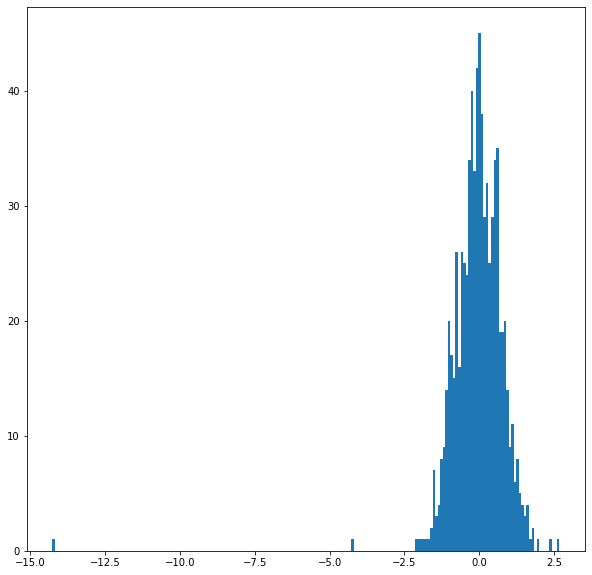

In [17]:
# For the 5th token in our sentence, select its feature values from layer 5.
token_i = 5
layer_i = 5
vec = hidden_states[layer_i][batch_i][token_i]

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()

In [18]:
# `hidden_states` is a Python list.
print('      Type of hidden_states: ', type(hidden_states))

# Each layer in the list is a torch tensor.
print('Tensor shape for each layer: ', hidden_states[0].size())

      Type of hidden_states:  <class 'tuple'>
Tensor shape for each layer:  torch.Size([1, 29, 768])


In [19]:
# Concatenate the tensors for all layers. We use `stack` here to
# create a new dimension in the tensor.
token_embeddings = torch.stack(hidden_states, dim=0)

token_embeddings.size()

torch.Size([13, 1, 29, 768])

In [20]:
# Remove dimension 1, the "batches".
token_embeddings = torch.squeeze(token_embeddings, dim=1)

token_embeddings.size()


torch.Size([13, 29, 768])

In [21]:
# Swap dimensions 0 and 1.
token_embeddings = token_embeddings.permute(1,0,2)

token_embeddings.size()

torch.Size([29, 13, 768])

In [22]:
# Stores the token vectors, with shape [36 x 3,072]
token_vecs_cat = []

# `token_embeddings` is a [36 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:
    
    # `token` is a [12 x 768] tensor

    # Concatenate the vectors (that is, append them together) from the last 
    # four layers.
    # Each layer vector is 768 values, so `cat_vec` is length 3,072.
    cat_vec = torch.cat((token[-1], token[-2], token[-3], token[-4]), dim=0)
    
    # Use `cat_vec` to represent `token`.
    token_vecs_cat.append(cat_vec)

print ('Shape is: %d x %d' % (len(token_vecs_cat), len(token_vecs_cat[0])))

Shape is: 29 x 3072


In [23]:
# Stores the token vectors, with shape [36 x 768]
token_vecs_sum = []

# `token_embeddings` is a [36 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:

    # `token` is a [12 x 768] tensor

    # Sum the vectors from the last four layers.
    sum_vec = torch.sum(token[-4:], dim=0)
    
    # Use `sum_vec` to represent `token`.
    token_vecs_sum.append(sum_vec)

print ('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))

Shape is: 29 x 768


In [24]:
# `hidden_states` has shape [13 x 1 x 36 x 768]

# `token_vecs` is a tensor with shape [36 x 768]
token_vecs = hidden_states[-2][0]

# Calculate the average of all 36 token vectors.
sentence_embedding = torch.mean(token_vecs, dim=0)

print ("Our final sentence embedding vector of shape:", sentence_embedding.size())

Our final sentence embedding vector of shape: torch.Size([768])


In [25]:
for i, token_str in enumerate(tokenized_text):
  print (i, token_str)

0 [CLS]
1 밥
2 ##을
3 많이
4 먹
5 ##어
6 ##서
7 배
8 ##가
9 부
10 ##르
11 ##다
12 .
13 고
14 ##기
15 ##잡
16 ##이
17 배
18 ##를
19 타
20 ##고
21 바
22 ##다
23 ##에
24 나
25 ##간
26 ##다
27 .
28 [SEP]


In [26]:
print('First 5 vector values for each instance of "배".')
print('')
print("배가 부르다   ", str(token_vecs_sum[6][:5]))
print("배를 타다  ", str(token_vecs_sum[10][:5]))
print("바다에 있는 배   ", str(token_vecs_sum[19][:5]))

First 5 vector values for each instance of "배".

배가 부르다    tensor([-0.8614, -4.0202,  0.5175,  4.6752, -0.2508])
배를 타다   tensor([-2.8054, -1.7042, -1.2464,  3.4185,  0.7771])
바다에 있는 배    tensor([-3.5947, -1.6634, -1.4143,  4.9749,  2.1335])


In [27]:
from scipy.spatial.distance import cosine

# Calculate the cosine similarity between the word 배 
# in "배를 타다" vs "배를 먹다" (different meanings).
diff_배 = 1 - cosine(token_vecs_sum[10], token_vecs_sum[19])

# Calculate the cosine similarity between the word 배
# in "배를 타다" vs "바다에 있는 배" (same meaning).
same_배 = 1 - cosine(token_vecs_sum[10], token_vecs_sum[6])

print('Vector similarity for  *similar*  meanings:  %.2f' % same_배)
print('Vector similarity for *different* meanings:  %.2f' % diff_배)

Vector similarity for  *similar*  meanings:  0.74
Vector similarity for *different* meanings:  0.59
